In [2]:
import torch
from torch.utils.data import DataLoader
from data import Corruptdata
import numpy as np
import matplotlib.pyplot as plt

In [3]:


# 定义一些参数
dir = '/mnt/datasets/CMR/MICCAIChallenge2023/ChallengeData/SingleCoil/Cine/PD/train/TrainingSet'
mask_dir='/mnt/datasets/CMR/MICCAIChallenge2023/ChallengeData/SingleCoil/Cine/PD/train/TrainingSet/Noise_Mask_6x8x4'
patient_list = ['P001','P002']  # 替换为你的患者列表
batch_size = 1  # 批次大小

# 创建数据集实例
dataset = Corruptdata(dir, mask_dir,4,patient_list)

# 创建数据加载器
data_loader = DataLoader(dataset, batch_size=1, shuffle=False)

# 遍历数据加载器以获取一个随机批次并进行测试
for inputs, rawk,targets in data_loader:
    # inputs 是归一化的数据，targets 是噪声掩码
    print("Inputs shape:", inputs.shape)
    print(rawk.shape)
    print("Targets shape:", targets.shape)
    
    # 在这里添加你的测试代码，例如打印批次的统计信息等

    # 跳出循环，因为我们只需要测试一个批次
    break

Inputs shape: torch.Size([1, 2, 12, 128, 128])
torch.Size([1, 2, 12, 128, 128])
Targets shape: torch.Size([1, 128, 128])


In [11]:
raw_img=np.fft.ifft2(rawk[:,0]+rawk[:,1]*1j)
raw_img_2=np.stack((raw_img.real,raw_img.imag),axis=1)
print(raw_img_2.shape)
raw_img_2.max()
raw_img_2.min()

(1, 2, 12, 128, 128)


-1.0000206187639955

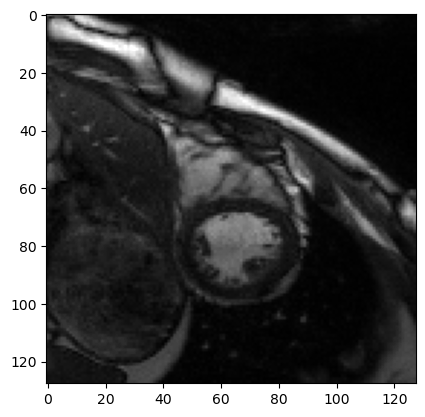

In [12]:
plt.imshow(np.abs(raw_img[0,6]),cmap='gray',vmax=1)  

In [15]:
img_2=torch.stack((img.real,img.imag),axis=1).squeeze()
img_2=img_2.numpy()

In [34]:
max_vals = abs(img_2).max(axis=-2, keepdims=True).max(axis=-1, keepdims=True)
min_vals = abs(img_2).min(axis=2, keepdims=True).min(axis=3, keepdims=True)
img_2=(img_2-min_vals)/(max_vals-min_vals)
print(img_2.max(),img_2.min())
print(img_2.shape)
kspace=np.fft.fft2(img_2[0]+img_2[1]*1j)
kspace.min()
img=np.fft.ifft2(kspace)
img=np.stack((img.real,img.imag),axis=1).squeeze()
img.max()
img.min()

1.0 -1.0
(2, 12, 128, 128)


-1.0000000000000004

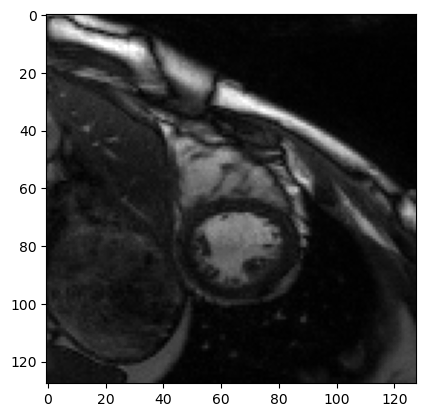

In [19]:
plt.imshow(img_show[6],cmap='gray',vmax=1)  

In [14]:

print(inputs.max())
print(inputs.min())
print(rawk.max())
test=rawk==inputs
print(test[0][0][0][10])


tensor(8196.1318)
tensor(-307.7755)
tensor(8196.1315, dtype=torch.float64)
tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, Fal

In [15]:
print(inputs[0][0].mean())

tensor(0.4580)


In [16]:
print(targets[0][0])
len(targets[0][0])

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.])


128

In [17]:
print(inputs[0][0][0][100])
inputs[0][0][0][66]

tensor([ 2.1995,  0.8838,  2.6094,  0.7816, -3.2826, -2.5584, -2.9021, -0.7852,
         1.4992, -0.9675,  2.5943,  1.4287, -3.2121, -0.2214,  2.2393, -0.9448,
        -0.0643,  2.7924, -2.7666,  3.3425,  4.1893, -2.9241,  0.6983,  2.7123,
        -0.0330,  4.9388, -1.2120, -1.1008,  0.6761,  0.2476,  1.0304, -1.2066,
        -0.9108, -0.4747,  1.0434, -0.9155,  2.2679, -0.9768,  0.6193, -1.7670,
        -1.9982, -4.7453, -0.7977,  4.0532,  2.0845,  1.5447,  2.8236,  3.5431,
         0.5982, -1.7255, -0.9855, -6.6767, -2.7515, -6.3750,  0.2937, -1.8601,
         3.7179,  3.7490,  2.9067,  4.3398, -0.5892,  4.2218,  3.9269,  1.5382,
         5.6798,  1.9348, -3.5716, -1.3225, -2.3467,  2.2277, -0.1528,  0.3000,
        -0.5852, -1.6920,  2.0790, -0.1478,  0.5138, -2.2924, -0.5046, -1.0240,
        -0.5169,  1.6186, -3.4475, -0.0121,  0.3340,  1.1835,  2.6247, -1.6914,
         0.7217,  1.6103, -4.6612,  2.0270,  1.5179, -1.2032, -1.5897, -0.6370,
        -0.8338,  3.1900, -1.5463,  1.20

tensor([ 4.3895e-01, -1.1120e+00,  5.1618e+00, -6.7405e-02, -1.0337e+00,
         1.9044e+00, -1.3576e+00, -7.7419e-01,  3.3574e+00,  4.4172e-01,
        -1.6818e+00,  3.3391e+00, -2.8663e+00,  2.6063e+00,  5.3272e+00,
         6.0857e-01, -1.2237e+00,  2.2385e+00,  1.7681e+00,  1.7942e+00,
         2.5131e+00, -1.0766e-01, -5.4010e-01,  4.5810e+00, -1.4263e-01,
         1.0777e+00,  1.6781e+00, -7.8216e+00,  3.6814e+00,  1.8213e+00,
        -1.9238e+00,  4.8943e+00,  1.3251e+00, -2.3030e+00,  3.8290e+00,
         4.1732e+00, -4.4411e+00,  1.6218e+00,  5.5249e+00, -1.6483e+00,
         2.5590e+00,  8.8490e+00,  1.0098e+00,  2.2099e+00,  5.4544e+00,
         2.3958e+00, -4.9863e+00,  1.0728e+01, -7.0304e+00,  5.7929e+00,
         2.6679e+00,  4.1351e+00,  2.3072e+00,  3.6989e+01, -1.8566e+01,
        -1.0476e+01,  1.9712e+01,  4.6412e+00,  9.8226e+00, -1.1392e+01,
         2.5171e+01, -5.9524e+01,  1.3251e+01,  4.5819e+01, -1.2293e+02,
         1.7194e+02, -2.6190e+01,  2.7648e+01,  2.1

In [18]:
import numpy as np
import matplotlib.pyplot as plt


In [19]:
img=np.fft.ifft2(inputs[:,0]+inputs[:,1]*1j,axes=(-2,-1))
print(abs(img).max())
print(abs(img).min())
raw_img=np.fft.ifft2(rawk[:,0]+rawk[:,1]*1j)
print(abs(raw_img).max())
print(abs(raw_img).min())
img

1.1480477165530716
0.3683702566203456
1.1535888822407272
0.3605463928702352


array([[[[0.71930795+0.52590265j, 0.29005858+0.45409412j,
          0.67867702+0.52153163j, ..., 0.50026518+0.50343458j,
          0.50732197+0.49468487j, 0.49167316+0.5141854j ],
         [0.38932777+0.46404613j, 0.57188731+0.52445983j,
          0.51519605+0.47280689j, ..., 0.50252631+0.50958393j,
          0.49307984+0.48987728j, 0.50079184+0.51044615j],
         [0.51883076+0.5696172j , 0.56759131+0.44527985j,
          0.34592107+0.5548742j , ..., 0.49640676+0.50823477j,
          0.50489422+0.49920982j, 0.49914283+0.50438462j],
         ...,
         [0.50606932+0.52631787j, 0.4887768 +0.46619627j,
          0.50721144+0.52753935j, ..., 0.43766482+0.39721371j,
          0.5683409 +0.60189359j, 0.4319565 +0.39554575j],
         [0.49354252+0.45877899j, 0.50817291+0.53212419j,
          0.4832674 +0.46543901j, ..., 0.56242592+0.58643807j,
          0.43355002+0.41278005j, 0.56710848+0.58806245j],
         [0.50746249+0.53828944j, 0.49415645+0.46110953j,
          0.50683986+0.53394

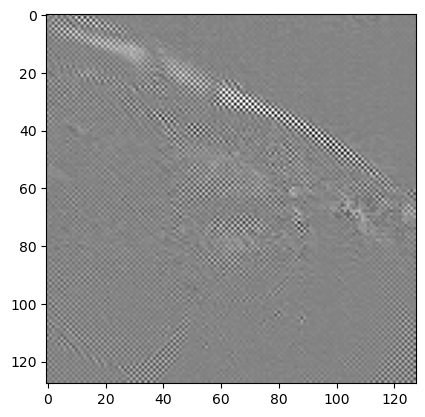

In [20]:

plt.imshow(np.abs(img[0,7]),cmap='gray',vmax=1)

In [21]:
plt.imshow(np.abs(raw_img[10,8]),cmap='gray',vmax=1)

IndexError: index 10 is out of bounds for axis 0 with size 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [ ]:
raw_show=np.abs(raw_img)[3]

In [ ]:
crop_show=np.abs(img)[3]

IndexError: index 12 is out of bounds for axis 0 with size 12

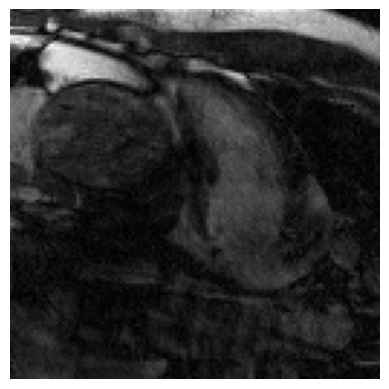

In [ ]:
fig, ax = plt.subplots()

# 禁用坐标轴
ax.axis('off')

# 初始化一个空的图像对象
im = ax.imshow(crop_show[0], cmap='gray')

# 更新函数，用于更新图像内容
def update(frame):
    im.set_array(crop_show[frame])
    return im,

# 创建动画对象
ani = FuncAnimation(fig, update, frames=len(crop_show[0]), interval=1)
ani.save('crop_video.gif', writer='pillow')
plt.show()

IndexError: index 12 is out of bounds for axis 0 with size 12

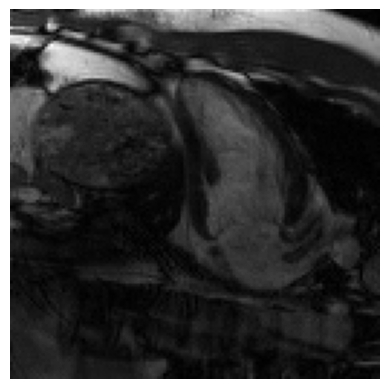

In [ ]:
fig, ax = plt.subplots()

# 禁用坐标轴
ax.axis('off')

# 初始化一个空的图像对象
im = ax.imshow(raw_show[0], cmap='gray')

# 更新函数，用于更新图像内容
def update(frame):
    im.set_array(raw_show[frame])
    return im,

# 创建动画对象
ani = FuncAnimation(fig, update, frames=len(raw_show[0]), interval=1)
ani.save('raw_video.gif', writer='pillow')
plt.show()